<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/JingQian_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats


## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

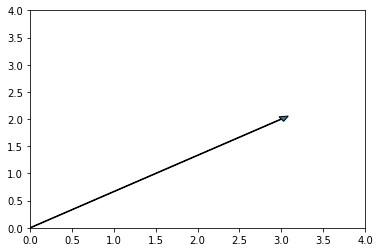

In [2]:
a = np.array([3,2])
plt.arrow(0,0,3,2, width=.01, head_width=.1, head_length=.1)
plt.xlim(0,4)
plt.ylim(0,4)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
b = np.array([17, -4, -2, 1])
np.linalg.norm(b)
## the norm of a vector represents its length

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = np.array([3,7, -2, 12])
d = np.array([9, -7, 4, 6])
np.dot(c,d)
# These two vectors are not orthogonal since their dot product is not zero.
# For orthogonal vector, the cosine of angle between their direction is zero,
#   so their inner product should be zero

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [5]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])
# Einv = np.linalg.inv(E)
print('E inversed is', '\n',np.linalg.inv(E),'\n')
print('E transposed is','\n',np.transpose(E))

E inversed is 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]] 

E transposed is 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


## 1.5 Find $|F|$ - What is one reason why the determinant of a matrix would be 0? 

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [6]:
F = np.array([[2,-2,5],[4,1,10],[12,6,30]])
print('Determiant of F is', np.linalg.det(F))
# The reason F has zero determinant is that its col 1 and col 3 are linearly dependent.
 # So the volumn in the 3d space transformed by this matrix F will be collapsed 
 # into 2D space, thus its determinant (volumn) will be zero. 

Determiant of F is 0.0


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, sample variance, and sample standard deviation for both the number of customers and inches of new snow for the week. Remember that on SCs you can use library functions, dataframes, .describe(), etc. 



In [7]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]
data = np.array([customers, snow]).T
df = pd.DataFrame(data = data, columns = ['customers','snow'])
variance = np.sum((df-np.mean(df))**2)/(df.shape[0]-1)
print(f'Variance is {variance}')
df.describe()

Variance is customers    98761.904762
snow             8.571429
dtype: float64


,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [8]:
# The variance on not comparable, because they have different units than the mean.
# Let's compare use a chi-square to check if they are dependent
# null hypothesis: there is no dependent of the variance of these two varibles
observed = pd.crosstab(df['customers'], df['snow'])
print(observed)
chi2, p, dof, expected = stats.chi2_contingency(observed)
print(f'Chi-squared: {chi2}')
print(f'p-value: {p}')
print(f'Degree of freedom: {dof}')
print('Expected: \n', np.array(expected))
# conclusion: p-value is not small enough to reject null, cannot say they are independent.

snow       0  1  4  6  7
customers               
760        0  1  0  0  0
820        1  0  0  0  0
990        0  1  0  0  0
1080       1  0  0  0  0
1250       0  0  0  0  1
1450       0  0  0  1  0
1600       0  0  1  0  0
Chi-squared: 28.000000000000007
p-value: 0.2600399224594336
Degree of freedom: 24
Expected: 
 [[0.28571429 0.28571429 0.14285714 0.14285714 0.14285714]
 [0.28571429 0.28571429 0.14285714 0.14285714 0.14285714]
 [0.28571429 0.28571429 0.14285714 0.14285714 0.14285714]
 [0.28571429 0.28571429 0.14285714 0.14285714 0.14285714]
 [0.28571429 0.28571429 0.14285714 0.14285714 0.14285714]
 [0.28571429 0.28571429 0.14285714 0.14285714 0.14285714]
 [0.28571429 0.28571429 0.14285714 0.14285714 0.14285714]]


## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [9]:
np.cov(data)

array([[ 336200. ,  311190. ,  509630. ,  405490. ,  442800. ,  592040. ,
         654360. ],
       [ 311190. ,  288040.5,  471718.5,  375325.5,  409860. ,  547998. ,
         605682. ],
       [ 509630. ,  471718.5,  772524.5,  614663.5,  671220. ,  897446. ,
         991914. ],
       [ 405490. ,  375325.5,  614663.5,  489060.5,  534060. ,  714058. ,
         789222. ],
       [ 442800. ,  409860. ,  671220. ,  534060. ,  583200. ,  779760. ,
         861840. ],
       [ 592040. ,  547998. ,  897446. ,  714058. ,  779760. , 1042568. ,
        1152312. ],
       [ 654360. ,  605682. ,  991914. ,  789222. ,  861840. , 1152312. ,
        1273608. ]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [10]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)
# df = df.set_index('Country')
# df = df.transpose()
# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [11]:
df.isnull().sum()

Country               0
Cheese                0
Carcass_Meat          0
Other_Meat            0
Fish                  0
Fats_and_Oils         0
Sugars                0
Fresh_Potatoes        0
Fresh_Veg             0
Other_Veg             0
Processed_Potatoes    0
Processed_Veg         0
Fresh_Fruit           0
Cereals               0
Beverages             0
Soft_Drinks           0
Alcoholic Drinks      0
Confectionery         0
dtype: int64

In [12]:
# Since I am trying to figure out where people live based on their diet , 
# I select Country as my y varible
Y = df['Country']
X = df.drop('Country', axis=1)
X.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
# preprocess X for PCA by standardize its entry
scaler = StandardScaler()
Z = scaler.fit_transform(X) 

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. 

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    INPUT: pca - the result of instantian of PCA in scikit learn 
    OUTPUT: None
    '''
    num_components=len(pca.explained_variance_ratio_) # number of PCA components
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(12, 5))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=11)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

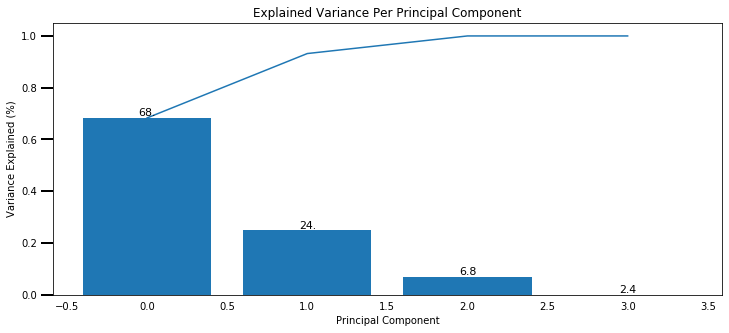

In [15]:
pca = PCA(4)
pca_columns = pca.fit_transform(Z)
pca_columns
scree_plot(pca)
# Based on the scree plot, 2 PCs will be surfficient to cover 92% variation
# and 3 PCs will be surfficient to cover >98% variation, we select first 2PCs

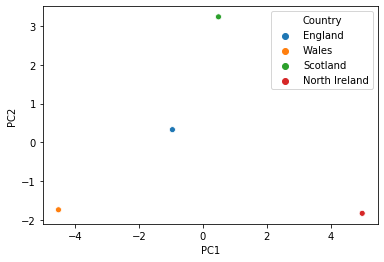

In [16]:
# use 2 pca component to do the pca transformation
pca = PCA(n_components=2)
pca_columns = pca.fit_transform(Z)
# concatenate y into a new dataframe
pca_df = pd.DataFrame(pca_columns, columns=['PC1','PC2'])
pca_df['Country'] = Y
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax = sns.scatterplot(x='PC1',y='PC2',hue='Country',data=pca_df)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

## 3.3 What are Eigenvalues and Eigenvectors? -In general, not just in PCA.

Eigenvectors are associated with matrix. \\

The eigenvectors of matrix M are the special vectors in the vector space that don't change direction during the transformation by M. \\

Eigenvectors can be stretched or squished by factors, which are their correspondent eigenvalues.

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [17]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


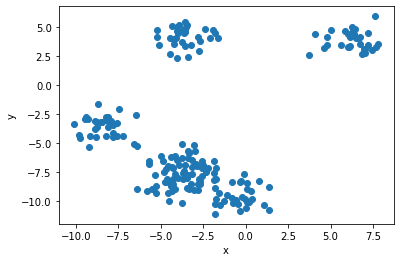

In [18]:
# take a peek at the data
fig,ax = plt.subplots()
plt.scatter(points.x, points.y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
kmeans = KMeans(5)
output = kmeans.fit(points)
points['cluster_label'] = output.labels_
points.head()

,x,y,cluster_label
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,4
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,1


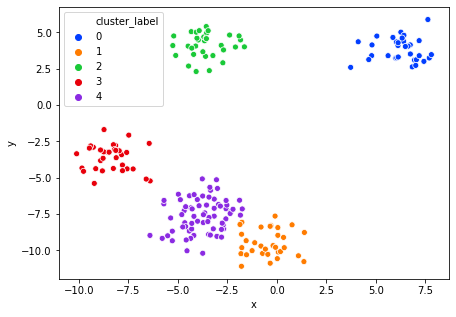

In [20]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
# current_palette = sns.color_palette()

palette = sns.color_palette("bright", 5)  #Choosing color
ax = sns.scatterplot(x=points.x, y=points.y, palette=palette, \
                     hue=points['cluster_label'], data=points, legend='full')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

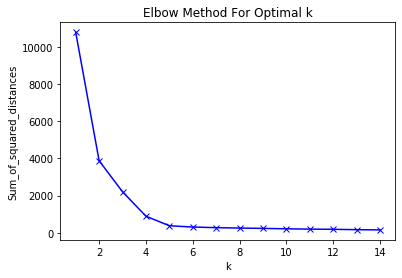

In [21]:
# check the elbow plot to verify the right choice on cluster number 
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

fig, ax = plt.subplots()
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Based on the Elbow plot, we can say k = 4 or 5 are a good choice for the dataset 

# Stretch Goals (AKA how to get a 3):

Complete the stretch goals for each section in order to get a 3 on that section.

## Parts 1 & 2 (do all of the following): 
  - Comment your code well with both markdown and inline comments where appropriate
  - Show your work with code and possibly LaTeX 
  - Justify your answers particularly well to show advanced mastery of this section

## Part 3 (do all of the following): 
 - Create a Scree Plot to show the Proportion of Explained Variance of each Principal Component (more than the first two)
    - If you want to include a the cumulative proportion of explained variance, you might be interested in this NumPy Function: [numpy.cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
 - Give a top-notch explanation of eigenvalues and eigenvectors. Feel free to any materials, images, code, graphs, LaTeX, etc. to spruce up your answer.

## Part 4 (do all of the following):
- Justify your choice of k, both visually (scatterplot) and mathematically (elbow plot).